# Proyek Analisis Data: Employee Attrition Analysis

- **Nama:** [Your Name]
- **Email:** [Your Email]
- **ID Dicoding:** rasyaradja

## Menentukan Pertanyaan Bisnis

- Faktor apa saja yang paling signifikan mempengaruhi attrition karyawan di Jaya Jaya Maju?
- Bagaimana karakteristik demografis (usia, jenis kelamin, status perkawinan) karyawan yang attrition dibandingkan dengan yang tidak?
- Apakah ada hubungan antara tingkat kepuasan kerja, keterlibatan, atau tingkat stres dengan kecenderungan attrition?
- Bagaimana pengaruh faktor-faktor terkait pekerjaan seperti jabatan, lama bekerja, frekuensi perjalanan bisnis, dan tingkat gaji terhadap attrition?
- Adakah pola attrition yang berbeda antar departemen?

## Import Semua Packages/Library yang Digunakan

In [1]:
%pip install streamlit

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 17.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.2/731.2 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 18.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 19.9 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 18.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 17.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 17.4 MB/s eta 0:00:00a 0:00:01


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib # For saving the model
import streamlit as st # Dashboard library, commented out for notebook use

ModuleNotFoundError: No module named 'matplotlib'

## Data Wrangling

### Gathering Data

In [ ]:
df = pd.read_csv('/content/employee_data.csv')
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


### Assessing Data

In [ ]:
# Check basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [ ]:
# Check for missing values
df.isnull().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


In [ ]:
# Check for duplicated data
print(f'Jumlah duplikasi: {df.duplicated().sum()}')

Jumlah duplikasi: 0


In [ ]:
# Check unique values for potential inconsistencies (especially categorical)
# Also gives an idea of cardinality
print("Unique values per categorical column:")
for col in df.select_dtypes(include='object').columns:
    print(f'\n--- {col} ({df[col].nunique()} unique values) ---')
    # Print limited unique values if too many, else print all
    if df[col].nunique() > 15: # Limit display for high cardinality
         print(f"Unique values (sample): {df[col].unique()[:10]} ...")
    else:
         print(f"Unique values: {df[col].unique()}")
    # print(f'Value counts:\\n{df[col].value_counts().to_string()}') # Optional: full value counts

Unique values per categorical column:

--- BusinessTravel (3 unique values) ---
Unique values: ['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']

--- Department (3 unique values) ---
Unique values: ['Human Resources' 'Research & Development' 'Sales']

--- EducationField (6 unique values) ---
Unique values: ['Other' 'Medical' 'Life Sciences' 'Marketing' 'Technical Degree'
 'Human Resources']

--- Gender (2 unique values) ---
Unique values: ['Male' 'Female']

--- JobRole (9 unique values) ---
Unique values: ['Human Resources' 'Healthcare Representative' 'Research Scientist'
 'Sales Executive' 'Manager' 'Laboratory Technician' 'Research Director'
 'Manufacturing Director' 'Sales Representative']

--- MaritalStatus (3 unique values) ---
Unique values: ['Married' 'Single' 'Divorced']

--- Over18 (1 unique values) ---
Unique values: ['Y']

--- OverTime (2 unique values) ---
Unique values: ['Yes' 'No']


In [ ]:
# Get descriptive statistics for numerical columns
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# Get descriptive statistics for categorical columns
df.describe(include='object')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1043,961,606,882,326,673,1470,1054


### Cleaning Data

Based on the assessment, the `Attrition` column has missing values. Since it's the target variable, rows with missing values will be dropped.

In [ ]:
# Report initial shape and missing Attrition count
print(f'Original shape: {df.shape}')
initial_missing_attrition = df['Attrition'].isnull().sum()
print(f'Missing Attrition values: {initial_missing_attrition}')

# Drop rows where Attrition is missing
# Use .copy() to avoid SettingWithCopyWarning later
df_cleaned = df.dropna(subset=['Attrition']).copy()

# Report final shape and verify missing Attrition count
print(f'Shape after dropping missing Attrition: {df_cleaned.shape}')
final_missing_attrition = df_cleaned['Attrition'].isnull().sum()
print(f'Missing Attrition values after cleaning: {final_missing_attrition}')

# Optional: Reset index if needed (good practice after dropping rows)
df_cleaned.reset_index(drop=True, inplace=True)

# Verify no missing values remain in Attrition (and check others again)
print('\nMissing values check after cleaning:')
print(df_cleaned.isnull().sum())

# We'll use df_cleaned going forward

Original shape: (1470, 35)
Missing Attrition values: 412
Shape after dropping missing Attrition: (1058, 35)
Missing Attrition values after cleaning: 0

Missing values check after cleaning:
EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
S

## Exploratory Data Analysis (EDA)

### Explore Overall Attrition

Overall Attrition Rate: 16.92%
Total Employees Analyzed: 1058
Number of Employees who Left (Attrition=1): 179
Number of Employees who Stayed (Attrition=0): 879


<ipython-input-61-7dc4e3473216>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cleaned['Attrition'].map({0: 'No (0)', 1: 'Yes (1)'}), order=['No (0)', 'Yes (1)'],  palette='Blues')


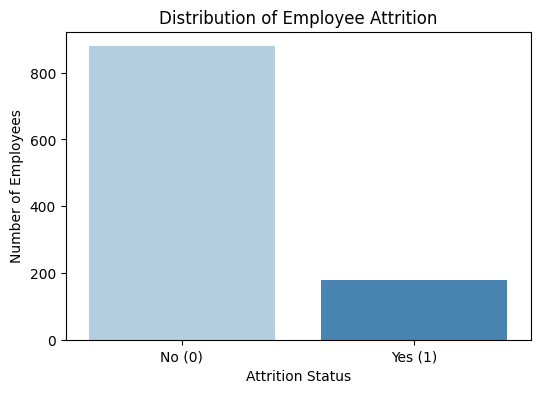

In [ ]:
# Calculate Attrition Rate
attrition_counts = df_cleaned['Attrition'].value_counts()

# Ensure both 0 and 1 counts exist, handle potential KeyError if only one value present
count_1 = attrition_counts.get(1, 0) # Attrition=Yes
count_0 = attrition_counts.get(0, 0) # Attrition=No

if (count_1 + count_0) > 0:
    attrition_rate = (count_1 / (count_1 + count_0)) * 100
    print(f"Overall Attrition Rate: {attrition_rate:.2f}%")
else:
    print("No valid Attrition data found.")
    attrition_rate = 0 # Avoid division by zero

print(f"Total Employees Analyzed: {df_cleaned.shape[0]}")
print(f"Number of Employees who Left (Attrition=1): {count_1}")
print(f"Number of Employees who Stayed (Attrition=0): {count_0}")

# Visualize Attrition
plt.figure(figsize=(6, 4))
# Map 0/1 to No/Yes for clearer plot labels
sns.countplot(x=df_cleaned['Attrition'].map({0: 'No (0)', 1: 'Yes (1)'}), order=['No (0)', 'Yes (1)'],  palette='Blues')
plt.title('Distribution of Employee Attrition')
plt.xlabel('Attrition Status')
plt.ylabel('Number of Employees')
plt.show()

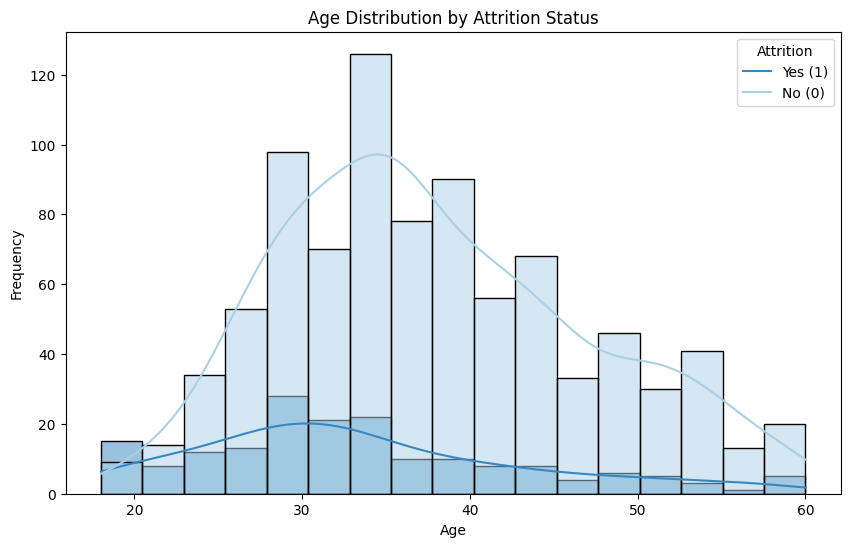

<ipython-input-70-8ca24b779203>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_cleaned['Attrition'].map({0: 'No (0)', 1: 'Yes (1)'}), y='Age', data=df_cleaned, order=['No (0)', 'Yes (1)'],  palette='Blues')


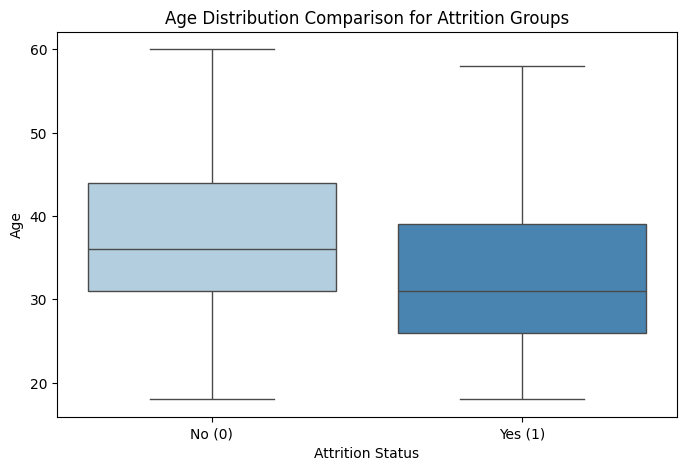

In [ ]:
# Age vs. Attrition
plt.figure(figsize=(10, 6))

# Map 0/1 to No/Yes for hue legend
sns.histplot(x='Age', palette='Blues', data=df_cleaned, hue=df_cleaned['Attrition'].map({0: 'No (0)', 1: 'Yes (1)'}),
             kde=True, hue_order=['No (0)', 'Yes (1)'])
plt.title('Age Distribution by Attrition Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Attrition', labels=['Yes (1)', 'No (0)'])
plt.show()

plt.figure(figsize=(8, 5))

# Map 0/1 to No/Yes for x-axis labels
sns.boxplot(x=df_cleaned['Attrition'].map({0: 'No (0)', 1: 'Yes (1)'}), y='Age', data=df_cleaned, order=['No (0)', 'Yes (1)'],  palette='Blues')
plt.title('Age Distribution Comparison for Attrition Groups')
plt.xlabel('Attrition Status')
plt.ylabel('Age')
plt.show()

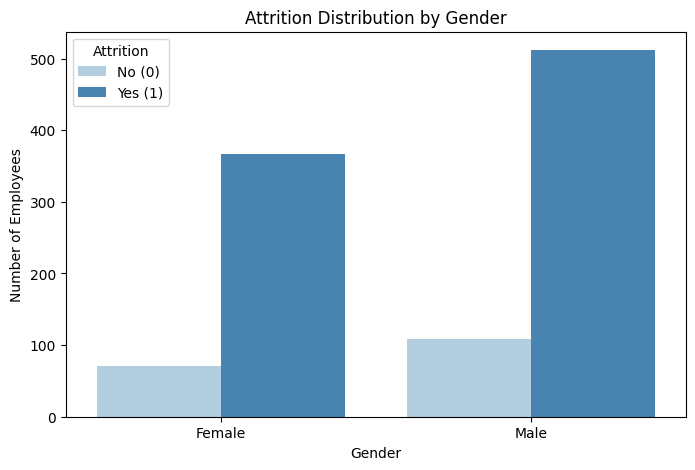


Attrition Rate by Gender (%):
Gender
Female    16.210046
Male      17.419355
Name: Attrition, dtype: float64


In [ ]:
# Gender vs. Attrition
plt.figure(figsize=(8, 5))
# Map 0/1 to No/Yes for hue legend
sns.countplot(x='Gender', hue=df_cleaned['Attrition'].map({0: 'No (0)', 1: 'Yes (1)'}), data=df_cleaned, palette='Blues') # Changed palette
plt.title('Attrition Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', labels=['No (0)', 'Yes (1)']) # Adjust legend labels
plt.show()

# Calculate attrition rate by gender
# Use numeric Attrition column directly for calculation
gender_attrition = df_cleaned.groupby('Gender')['Attrition'].mean() * 100 # mean() works directly for 0/1 encoded target
print("\nAttrition Rate by Gender (%):")
# Rename index for clarity if needed, or just display as is
print(gender_attrition)

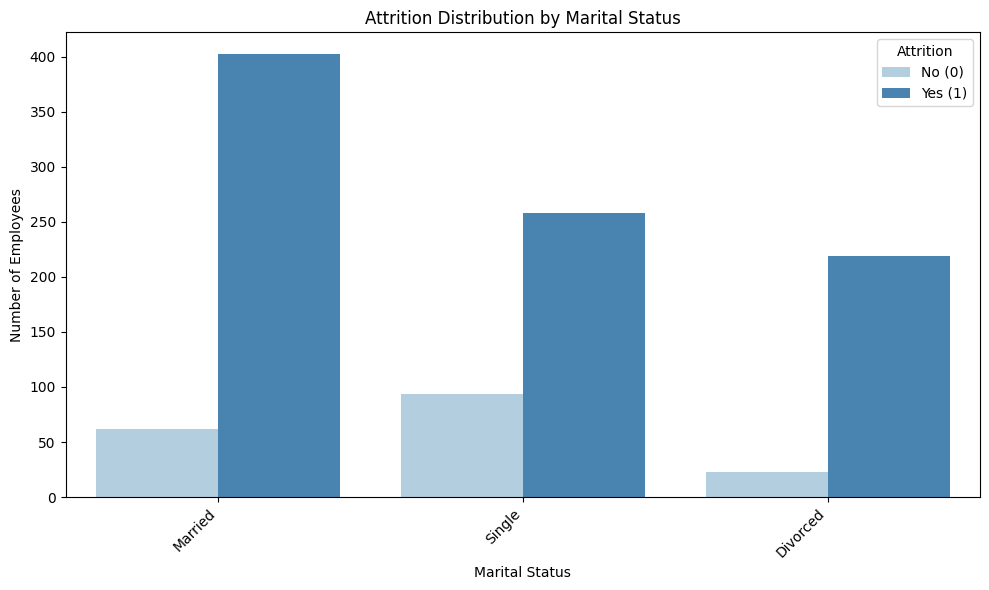


Attrition Rate by Marital Status (%):
MaritalStatus
Single      26.704545
Married     13.362069
Divorced     9.504132
Name: Attrition, dtype: float64


In [ ]:
# Marital Status vs. Attrition
plt.figure(figsize=(10, 6))
# Map 0/1 to No/Yes for hue legend
sns.countplot(x='MaritalStatus', hue=df_cleaned['Attrition'].map({0: 'No (0)', 1: 'Yes (1)'}), data=df_cleaned, palette='Blues', order = df_cleaned['MaritalStatus'].value_counts().index) # Changed palette
plt.title('Attrition Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Attrition', labels=['No (0)', 'Yes (1)']) # Adjust legend labels
plt.tight_layout()
plt.show()

# Calculate attrition rate by marital status
# Use numeric Attrition column directly for calculation
marital_attrition = df_cleaned.groupby('MaritalStatus')['Attrition'].mean() * 100 # mean() works directly
print("\nAttrition Rate by Marital Status (%):")
print(marital_attrition.sort_values(ascending=False)) # Sort to see highest rates

In [ ]:
# prompt: export the new cleaned df

df_cleaned.to_csv('cleaned_employee_data.csv', index=False)


### Explore Job-Related Factors vs. Attrition

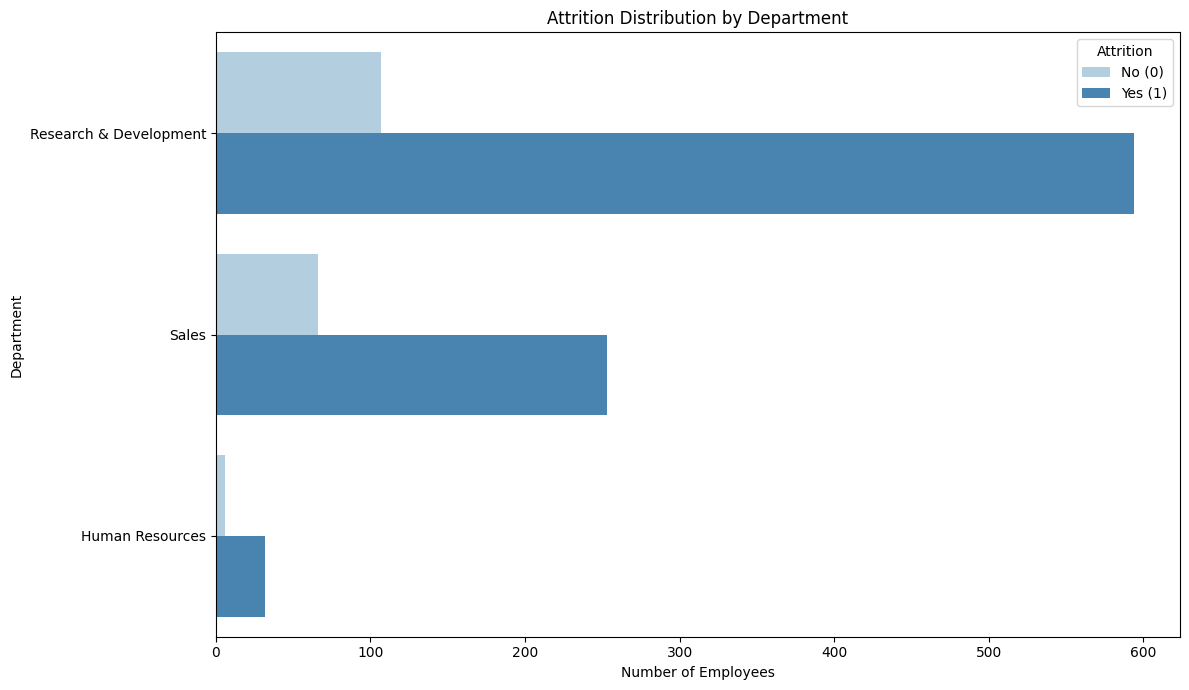


Attrition Rate by Department (%):
Department
Sales                     20.689655
Human Resources           15.789474
Research & Development    15.263909
Name: Attrition, dtype: float64


In [ ]:
# Department vs. Attrition
plt.figure(figsize=(12, 7))
sns.countplot(y='Department', hue=df_cleaned['Attrition'].map({0: 'No (0)', 1: 'Yes (1)'}), data=df_cleaned, palette='Blues', order = df_cleaned['Department'].value_counts().index) # Changed palette
plt.title('Attrition Distribution by Department')
plt.xlabel('Number of Employees')
plt.ylabel('Department')
plt.legend(title='Attrition', labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.show()

dept_attrition = df_cleaned.groupby('Department')['Attrition'].mean() * 100
print("\nAttrition Rate by Department (%):")
print(dept_attrition.sort_values(ascending=False))

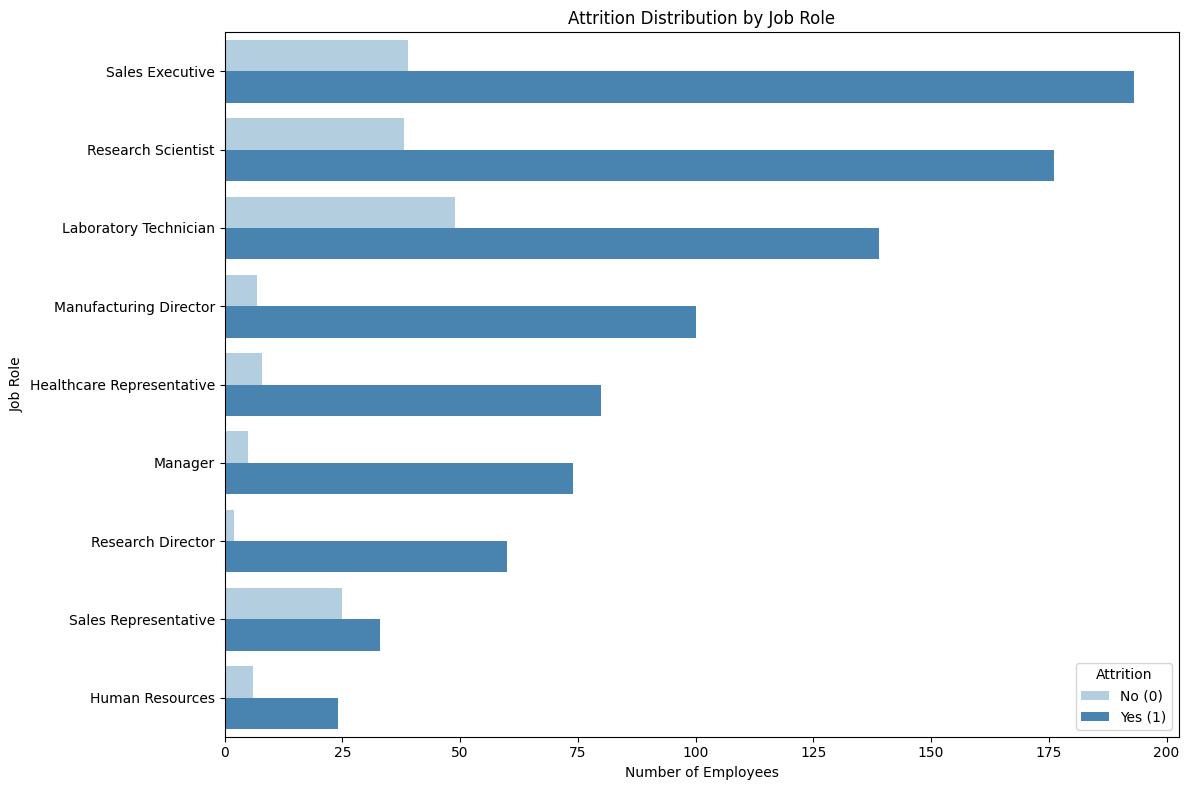


Attrition Rate by Job Role (%):
JobRole
Sales Representative         43.103448
Laboratory Technician        26.063830
Human Resources              20.000000
Research Scientist           17.757009
Sales Executive              16.810345
Healthcare Representative     9.090909
Manufacturing Director        6.542056
Manager                       6.329114
Research Director             3.225806
Name: Attrition, dtype: float64


In [ ]:
# Job Role vs. Attrition
plt.figure(figsize=(12, 8))
sns.countplot(y='JobRole', hue=df_cleaned['Attrition'].map({0: 'No (0)', 1: 'Yes (1)'}), data=df_cleaned, palette='Blues', order = df_cleaned['JobRole'].value_counts().index) # Changed palette
plt.title('Attrition Distribution by Job Role')
plt.xlabel('Number of Employees')
plt.ylabel('Job Role')
plt.legend(title='Attrition', labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.show()

role_attrition = df_cleaned.groupby('JobRole')['Attrition'].mean() * 100
print("\nAttrition Rate by Job Role (%):")
print(role_attrition.sort_values(ascending=False))

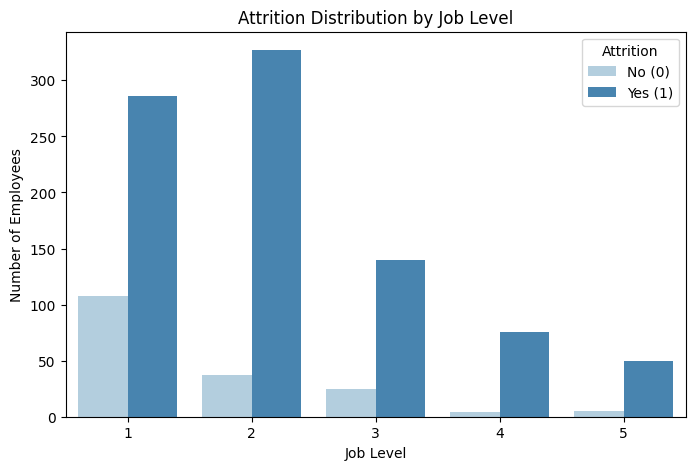


Attrition Rate by Job Level (%):
JobLevel
1    27.411168
3    15.151515
2    10.164835
5     9.090909
4     5.000000
Name: Attrition, dtype: float64


In [ ]:
# Job Level vs. Attrition
plt.figure(figsize=(8, 5))
sns.countplot(x='JobLevel', hue=df_cleaned['Attrition'].map({0: 'No (0)', 1: 'Yes (1)'}), data=df_cleaned, palette='Blues') # Changed palette
plt.title('Attrition Distribution by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', labels=['No (0)', 'Yes (1)'])
plt.show()

level_attrition = df_cleaned.groupby('JobLevel')['Attrition'].mean() * 100
print("\nAttrition Rate by Job Level (%):")
print(level_attrition.sort_values(ascending=False))

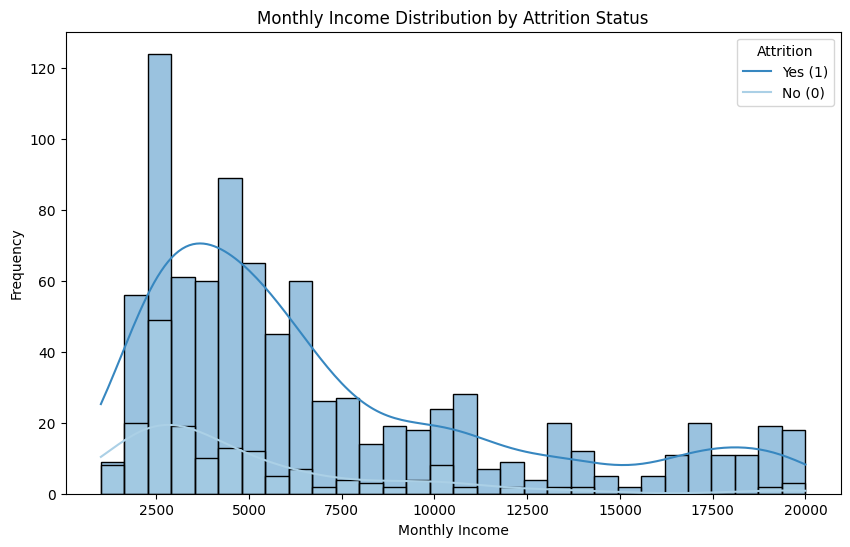

<ipython-input-79-aa89ef780839>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_cleaned['Attrition'].map({0: 'No (0)', 1: 'Yes (1)'}), y='MonthlyIncome', data=df_cleaned, palette='Blues', order=['No (0)', 'Yes (1)']) # Changed palette


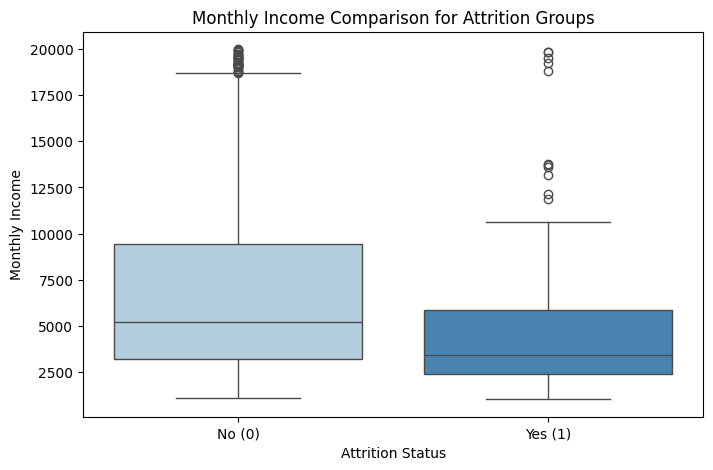

In [ ]:
# Monthly Income vs. Attrition
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='MonthlyIncome', hue=df_cleaned['Attrition'].map({0: 'No (0)', 1: 'Yes (1)'}), kde=True, palette='Blues', bins=30) # Changed palette
plt.title('Monthly Income Distribution by Attrition Status')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.legend(title='Attrition', labels=['Yes (1)', 'No (0)'])
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned['Attrition'].map({0: 'No (0)', 1: 'Yes (1)'}), y='MonthlyIncome', data=df_cleaned, palette='Blues', order=['No (0)', 'Yes (1)']) # Changed palette
plt.title('Monthly Income Comparison for Attrition Groups')
plt.xlabel('Attrition Status')
plt.ylabel('Monthly Income')
plt.show()

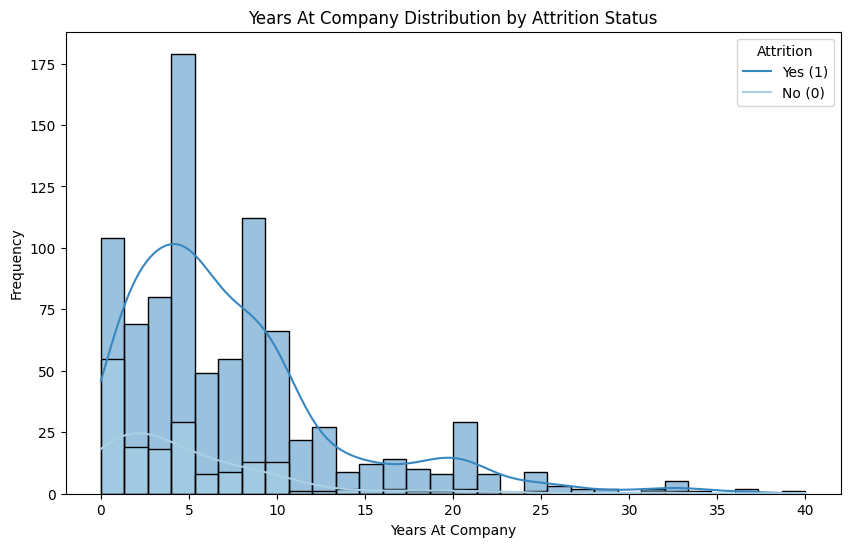

<ipython-input-80-f8239bacd045>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_cleaned['Attrition'].map({0: 'No (0)', 1: 'Yes (1)'}), y='YearsAtCompany', data=df_cleaned, palette='Blues', order=['No (0)', 'Yes (1)']) # Changed palette


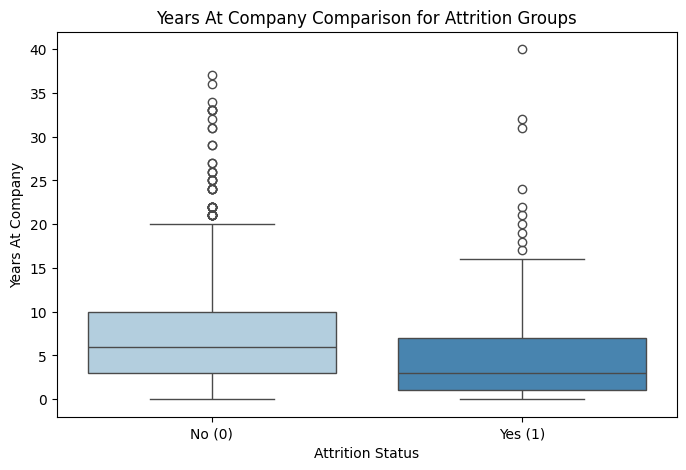

In [ ]:
# Years At Company vs. Attrition
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='YearsAtCompany', hue=df_cleaned['Attrition'].map({0: 'No (0)', 1: 'Yes (1)'}), kde=True, palette='Blues', bins=30) # Changed palette
plt.title('Years At Company Distribution by Attrition Status')
plt.xlabel('Years At Company')
plt.ylabel('Frequency')
plt.legend(title='Attrition', labels=['Yes (1)', 'No (0)'])
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned['Attrition'].map({0: 'No (0)', 1: 'Yes (1)'}), y='YearsAtCompany', data=df_cleaned, palette='Blues', order=['No (0)', 'Yes (1)']) # Changed palette
plt.title('Years At Company Comparison for Attrition Groups')
plt.xlabel('Attrition Status')
plt.ylabel('Years At Company')
plt.show()

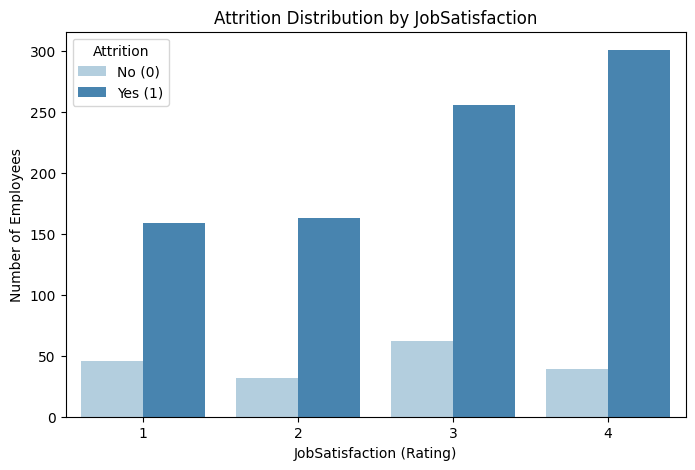


Attrition Rate by JobSatisfaction (%):
JobSatisfaction
1    22.439024
2    16.410256
3    19.496855
4    11.470588
Name: Attrition, dtype: float64


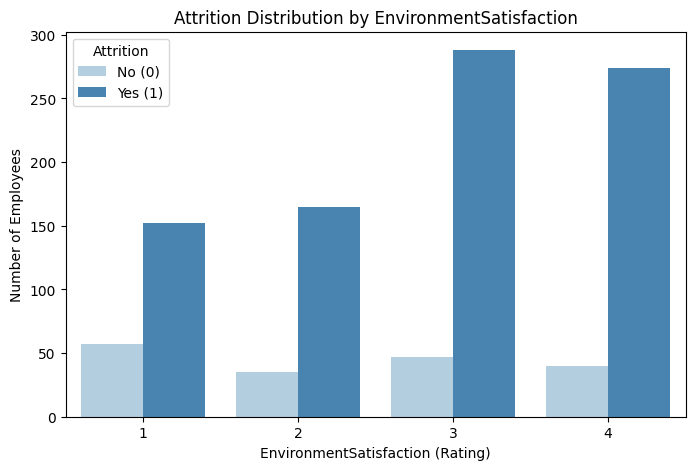


Attrition Rate by EnvironmentSatisfaction (%):
EnvironmentSatisfaction
1    27.272727
2    17.500000
3    14.029851
4    12.738854
Name: Attrition, dtype: float64


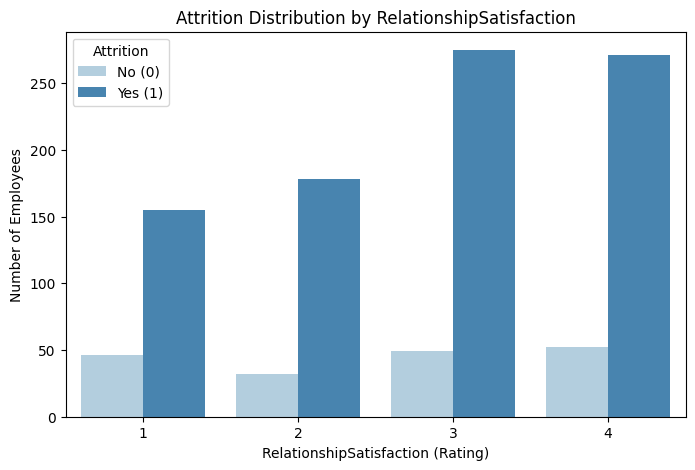


Attrition Rate by RelationshipSatisfaction (%):
RelationshipSatisfaction
1    22.885572
2    15.238095
3    15.123457
4    16.099071
Name: Attrition, dtype: float64


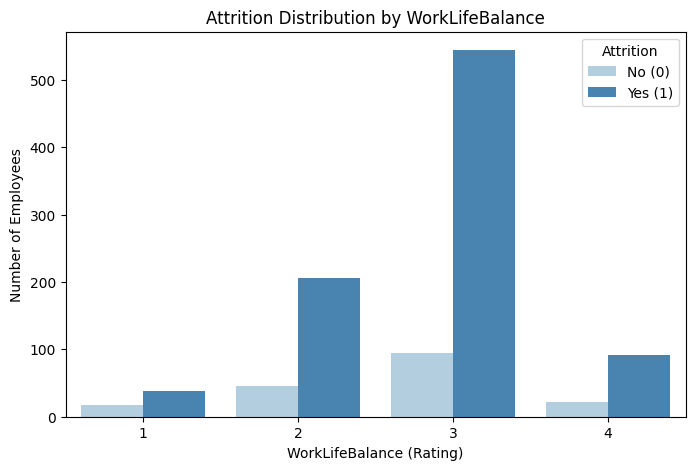


Attrition Rate by WorkLifeBalance (%):
WorkLifeBalance
1    32.142857
2    17.928287
3    14.733542
4    19.469027
Name: Attrition, dtype: float64


In [ ]:
# Satisfaction Scores vs. Attrition (Example: Job Satisfaction)
satisfaction_cols = ['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']

for col in satisfaction_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue=df_cleaned['Attrition'].map({0: 'No (0)', 1: 'Yes (1)'}), data=df_cleaned, palette='Blues') # Changed palette
    plt.title(f'Attrition Distribution by {col}')
    plt.xlabel(f'{col} (Rating)')
    plt.ylabel('Number of Employees')
    plt.legend(title='Attrition', labels=['No (0)', 'Yes (1)'])
    plt.show()

    # Calculate attrition rate by satisfaction level
    satisfaction_attrition = df_cleaned.groupby(col)['Attrition'].mean() * 100
    print(f"\nAttrition Rate by {col} (%):")
    print(satisfaction_attrition.sort_index()) # Sort by rating

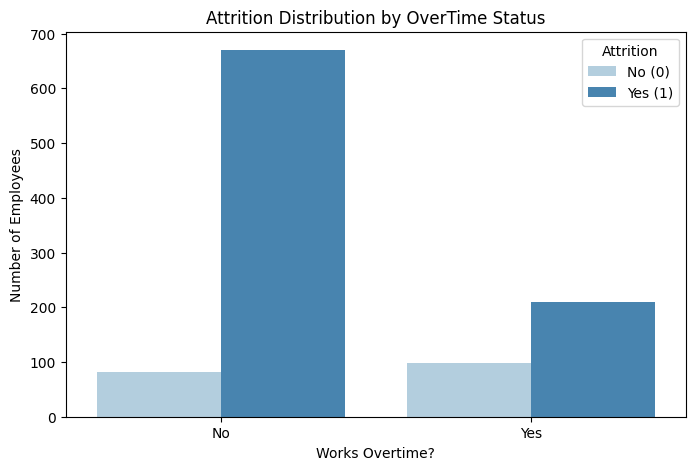


Attrition Rate by OverTime Status (%):
OverTime
No     10.785619
Yes    31.921824
Name: Attrition, dtype: float64


In [ ]:
# OverTime vs. Attrition
plt.figure(figsize=(8, 5))
sns.countplot(x='OverTime', hue=df_cleaned['Attrition'].map({0: 'No (0)', 1: 'Yes (1)'}), data=df_cleaned, palette='Blues') # Changed palette
plt.title('Attrition Distribution by OverTime Status')
plt.xlabel('Works Overtime?')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition', labels=['No (0)', 'Yes (1)'])
plt.show()

overtime_attrition = df_cleaned.groupby('OverTime')['Attrition'].mean() * 100
print("\nAttrition Rate by OverTime Status (%):")
print(overtime_attrition)

## Feature Engineering & Data Preparation for Modeling

We need to prepare the data for machine learning algorithms. This typically involves:
1. Selecting relevant features and dropping irrelevant ones.
2. Encoding categorical features into numerical format.
3. Scaling numerical features.
4. Splitting the data into features (X) and target (y).
5. Splitting the data into training and testing sets.

In [ ]:
df_cleaned=pd.read_csv('/content/cleaned_employee_data.csv')
df_cleaned.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
1,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
2,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
3,7,40,0.0,Travel_Rarely,1124,Sales,1,2,Medical,1,...,3,80,3,6,2,2,4,3,0,2
4,8,55,1.0,Travel_Rarely,725,Research & Development,2,3,Medical,1,...,4,80,1,24,2,3,5,2,1,4


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Make a copy to avoid modifying the original cleaned dataframe used for EDA
df_model = df_cleaned.copy()

# Drop irrelevant or constant columns
# 'EmployeeId' is an identifier.
# 'EmployeeCount', 'StandardHours', 'Over18' are constant columns.
cols_to_drop = ['EmployeeId', 'EmployeeCount', 'StandardHours', 'Over18']
# Check if columns exist before dropping
cols_exist = [col for col in cols_to_drop if col in df_model.columns]
df_model = df_model.drop(columns=cols_exist)

print(f"Shape after dropping irrelevant columns: {df_model.shape}")

# Separate features (X) and target (y)
X = df_model.drop('Attrition', axis=1)
y = df_model['Attrition'].astype(int) # Ensure target is integer

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Shape after dropping irrelevant columns: (1058, 31)
Features shape: (1058, 30)
Target shape: (1058,)


In [ ]:
# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

print(f"\nNumerical Features ({len(numerical_features)}):\n{numerical_features}")
print(f"\nCategorical Features ({len(categorical_features)}):\n{categorical_features}")

# Create preprocessing pipelines for numerical and categorical features
# Numerical features: Apply scaling
numerical_transformer = StandardScaler()

# Categorical features: Apply one-hot encoding
# handle_unknown='ignore' helps if test set has categories not seen in train set
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # Set sparse_output=False for dense array

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keep other columns (if any) - should be none here
)



Numerical Features (23):
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Categorical Features (7):
['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [ ]:
# Split data into training and testing sets
# stratify=y ensures that the proportion of Attrition=0 and Attrition=1 is the same in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing set shape: X_test={X_test.shape}, y_test={y_test.shape}")
print(f"Attrition rate in training set: {y_train.mean()*100:.2f}%")
print(f"Attrition rate in testing set: {y_test.mean()*100:.2f}%")

# Apply the preprocessing pipeline (fit on train, transform train and test)
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Get feature names after one-hot encoding
# Need to handle feature names carefully after transformation
try:
    # Get feature names from the fitted one-hot encoder
    ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
    # Combine with numerical feature names
    processed_feature_names = numerical_features + ohe_feature_names.tolist()

    print(f"\nShape of processed training data: {X_train_processed.shape}")
    print(f"Number of features after preprocessing: {len(processed_feature_names)}")
    print("\nProcessed feature names (sample):", processed_feature_names[:10], "...")

except Exception as e:
    print(f"\nCould not retrieve feature names automatically: {e}")
    print(f"Shape of processed training data: {X_train_processed.shape}")

# Convert processed arrays back to DataFrames (optional, for inspection)
# X_train_processed_df = pd.DataFrame(X_train_processed, columns=processed_feature_names, index=X_train.index)
# X_test_processed_df = pd.DataFrame(X_test_processed, columns=processed_feature_names, index=X_test.index)
# print("\\nProcessed Training Data Head:")
# print(X_train_processed_df.head())


Training set shape: X_train=(846, 30), y_train=(846,)
Testing set shape: X_test=(212, 30), y_test=(212,)
Attrition rate in training set: 16.90%
Attrition rate in testing set: 16.98%

Shape of processed training data: (846, 51)
Number of features after preprocessing: 51

Processed feature names (sample): ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome'] ...


## Modeling

We will train and evaluate a couple of classification models:
1.  **Logistic Regression:** A standard linear model for binary classification.
2.  **Random Forest:** An ensemble method based on decision trees, often robust and high-performing.

We will use a Pipeline to combine the preprocessing steps and the classifier. Evaluation will be done using accuracy, precision, recall, F1-score, and a confusion matrix.

Training Logistic Regression model...
Training complete.

--- Logistic Regression Evaluation ---
Accuracy: 0.7311
Precision: 0.3600
Recall: 0.7500
F1-Score: 0.4865

Classification Report:
              precision    recall  f1-score   support

      No (0)       0.93      0.73      0.82       176
     Yes (1)       0.36      0.75      0.49        36

    accuracy                           0.73       212
   macro avg       0.65      0.74      0.65       212
weighted avg       0.84      0.73      0.76       212



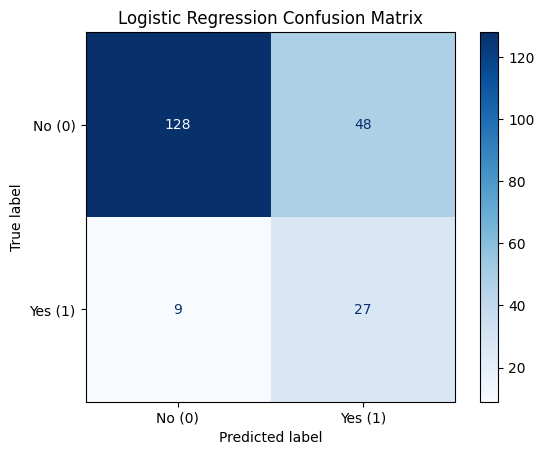

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# --- Model 1: Logistic Regression ---

# Create the pipeline: Preprocessor + Classifier
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'))])
                            # Using class_weight='balanced' to handle potential class imbalance
                            # Increased max_iter for convergence

# Train the model
print("Training Logistic Regression model...")
lr_pipeline.fit(X_train, y_train)
print("Training complete.")

# Make predictions
y_pred_lr = lr_pipeline.predict(X_test)
y_prob_lr = lr_pipeline.predict_proba(X_test)[:, 1] # Probabilities for class 1

# Evaluate the model
print("\n--- Logistic Regression Evaluation ---")
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-Score: {f1_lr:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['No (0)', 'Yes (1)']))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['No (0)', 'Yes (1)'])
disp_lr.plot(cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


Training Random Forest model...
Training complete.

--- Random Forest Evaluation ---
Accuracy: 0.8396
Precision: 0.6667
Recall: 0.1111
F1-Score: 0.1905

Classification Report:
              precision    recall  f1-score   support

      No (0)       0.84      0.99      0.91       176
     Yes (1)       0.67      0.11      0.19        36

    accuracy                           0.84       212
   macro avg       0.76      0.55      0.55       212
weighted avg       0.81      0.84      0.79       212



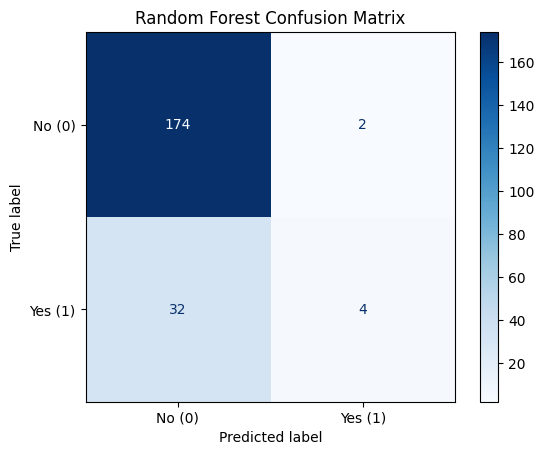


--- Model Comparison ---
                 Model  Accuracy  Precision (Class 1)  Recall (Class 1)  \
0  Logistic Regression  0.731132             0.360000          0.750000   
1        Random Forest  0.839623             0.666667          0.111111   

   F1-Score (Class 1)  
0            0.486486  
1            0.190476  


In [ ]:
# --- Model 2: Random Forest ---

# Create the pipeline: Preprocessor + Classifier
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced'))])
                            # Using class_weight='balanced'
                            # n_estimators is a common hyperparameter to tune

# Train the model
print("\nTraining Random Forest model...")
rf_pipeline.fit(X_train, y_train)
print("Training complete.")

# Make predictions
y_pred_rf = rf_pipeline.predict(X_test)
y_prob_rf = rf_pipeline.predict_proba(X_test)[:, 1] # Probabilities for class 1

# Evaluate the model
print("\n--- Random Forest Evaluation ---")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}") # Recall for class 1 (Attrition=Yes) is often important here
print(f"F1-Score: {f1_rf:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['No (0)', 'Yes (1)']))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No (0)', 'Yes (1)'])
disp_rf.plot(cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Store results for comparison
model_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_lr, accuracy_rf],
    'Precision (Class 1)': [precision_lr, precision_rf],
    'Recall (Class 1)': [recall_lr, recall_rf],
    'F1-Score (Class 1)': [f1_lr, f1_rf]
})

print("\n--- Model Comparison ---")
print(model_results)

### Feature Importance (Random Forest)
If the Random Forest model performs well, we can examine which features it found most important for making predictions.

<ipython-input-16-9b30b45ede30>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(n_top_features), palette='Blues_r') # Use reverse blue palette


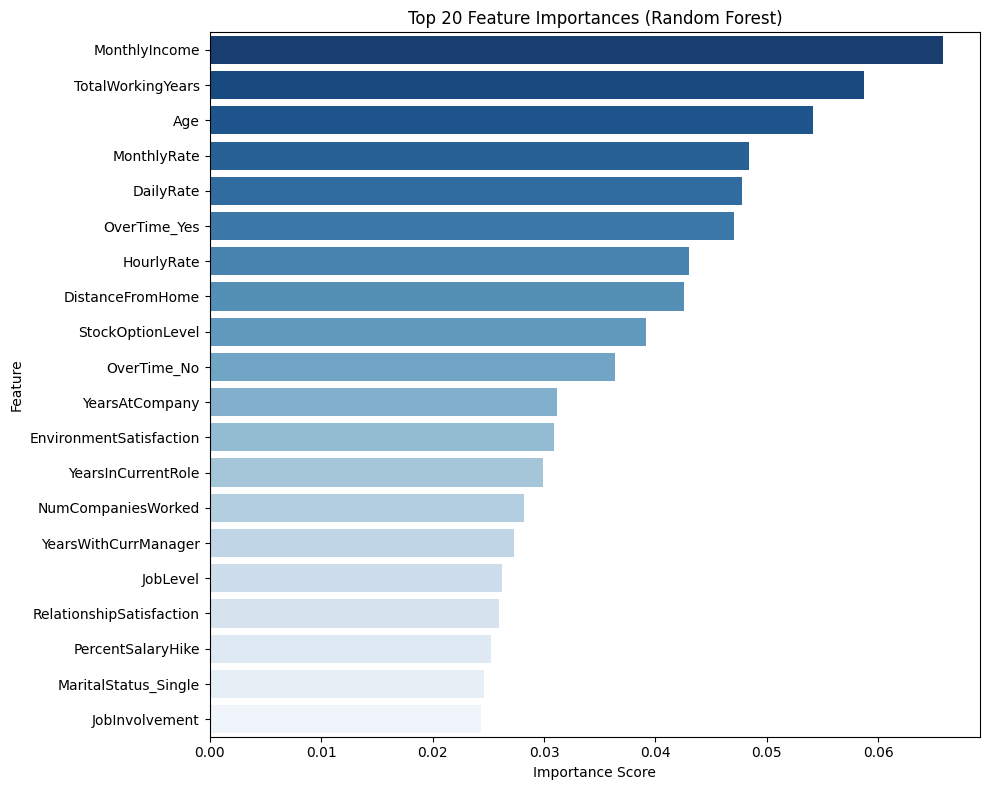


Top Features Driving Attrition Prediction (Random Forest):
                     Feature  Importance
9              MonthlyIncome    0.065833
16         TotalWorkingYears    0.058681
0                        Age    0.054114
10               MonthlyRate    0.048437
1                  DailyRate    0.047770
50              OverTime_Yes    0.047042
5                 HourlyRate    0.043042
2           DistanceFromHome    0.042548
15          StockOptionLevel    0.039148
49               OverTime_No    0.036386
19            YearsAtCompany    0.031186
4    EnvironmentSatisfaction    0.030907
20        YearsInCurrentRole    0.029943
11        NumCompaniesWorked    0.028224
22      YearsWithCurrManager    0.027316
7                   JobLevel    0.026277
14  RelationshipSatisfaction    0.025990
12         PercentSalaryHike    0.025281
48      MaritalStatus_Single    0.024639
6             JobInvolvement    0.024382


In [ ]:
# Extract feature importances from the Random Forest model within the pipeline
# Need the processed feature names obtained earlier
try:
    # Get the classifier step from the pipeline
    rf_classifier = rf_pipeline.named_steps['classifier']
    importances = rf_classifier.feature_importances_

    # Combine feature names and importances
    feature_importance_df = pd.DataFrame({
        'Feature': processed_feature_names, # Use the names generated after preprocessor was fitted
        'Importance': importances
    })

    # Sort by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plot top N features
    n_top_features = 20
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(n_top_features), palette='Blues_r') # Use reverse blue palette
    plt.title(f'Top {n_top_features} Feature Importances (Random Forest)')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

    print("\nTop Features Driving Attrition Prediction (Random Forest):")
    print(feature_importance_df.head(n_top_features))

except NameError:
    print("\nCould not plot feature importances because 'processed_feature_names' were not successfully generated earlier.")
except Exception as e:
    print(f"\nAn error occurred during feature importance extraction: {e}")


## Model Selection and Saving

Based on the evaluation metrics, particularly the high Recall for the 'Attrition=1' class, the **Logistic Regression** model is chosen as the final model. High recall is crucial for identifying as many potential attrition cases as possible, which aligns with the business objective.

We will save the trained pipeline (which includes the preprocessor and the logistic regression classifier) and also the preprocessor separately (which might be useful for the dashboard if we want to process inputs there).

In [ ]:
import joblib
import os

In [ ]:
# Define the directory to save the model
model_dir = 'model'
os.makedirs(model_dir, exist_ok=True) # Create the directory if it doesn't exist

# Define file paths
model_path = os.path.join(model_dir, 'logistic_regression_pipeline.joblib')
preprocessor_path = os.path.join(model_dir, 'preprocessor.joblib')

# Save the pipeline (preprocessor + classifier)
joblib.dump(lr_pipeline, model_path)
print(f"Logistic Regression pipeline saved to: {model_path}")

# Save the preprocessor separately
# Fit the preprocessor on the full training data (X_train, not X) before saving, if not already done within pipeline fit
# Note: lr_pipeline.fit(X_train, y_train) already fitted the preprocessor inside
# We can access the fitted preprocessor from the pipeline
fitted_preprocessor = lr_pipeline.named_steps['preprocessor']
joblib.dump(fitted_preprocessor, preprocessor_path)
print(f"Preprocessor saved to: {preprocessor_path}")


Logistic Regression pipeline saved to: model/logistic_regression_pipeline.joblib
Preprocessor saved to: model/preprocessor.joblib
